In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
budget=pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/AutoElite_Budget.csv")
budget.head()

,Month,Region,State,Model,Budgeted Quantity
0,January,South,Tamil Nadu,Hatchback,12
1,January,South,Tamil Nadu,SUV,8
2,January,South,Tamil Nadu,Sedan,6
3,January,South,Karnataka,Hatchback,11
4,January,South,Karnataka,SUV,7


In [ ]:
actual=pd.read_csv("https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/AutoElite_Actual.csv")
actual.head()

,SN,Transaction Details,Date,Month,State,Region,Model,Quantity Sold
0,1,ORD0014010123TNSHBK,1/1/2023,January,Tamil Nadu,South,Hatchback,1
1,2,ORD0045010323TNSHBK,1/3/2023,January,Tamil Nadu,South,Hatchback,3
2,3,ORD0046012723TNSHBK,1/27/2023,January,Tamil Nadu,South,Hatchback,4
3,4,ORD0047010423TNSHBK,1/4/2023,January,Tamil Nadu,South,Hatchback,1
4,5,ORD0015010323TNSSUV,1/3/2023,January,Tamil Nadu,South,SUV,3


In [ ]:
# budget.columns
budget.columns = budget.columns.str.lower().str.replace(' ', '_')
budget.columns

Index(['month', 'region', 'state', 'model', 'budgeted_quantity'], dtype='object')

In [ ]:
# actual.columns
actual.columns = actual.columns.str.lower().str.replace(' ', '_')
actual.columns

Index(['month', 'region', 'state', 'model', 'quantity_sold'], dtype='object')

In [ ]:
actual=actual.groupby(['month','region','state','model'])['quantity_sold'].sum().reset_index()
actual

,month,region,state,model,quantity_sold
0,April,East,West Bengal,Hatchback,10
1,April,East,West Bengal,SUV,8
2,April,East,West Bengal,Sedan,5
3,April,North,Haryana,Hatchback,9
4,April,North,Haryana,SUV,16
...,...,...,...,...,...
355,September,West,Gujarat,SUV,7
356,September,West,Gujarat,Sedan,8
357,September,West,Rajasthan,Hatchback,14
358,September,West,Rajasthan,SUV,6


In [ ]:
merged_table=pd.merge(budget,actual,on=['month','region','state','model'],how="left")
merged_table

,month,region,state,model,budgeted_quantity,quantity_sold
0,January,South,Tamil Nadu,Hatchback,12,9
1,January,South,Tamil Nadu,SUV,8,8
2,January,South,Tamil Nadu,Sedan,6,6
3,January,South,Karnataka,Hatchback,11,8
4,January,South,Karnataka,SUV,7,9
...,...,...,...,...,...,...
355,December,North,Uttar Pradesh,SUV,9,8
356,December,North,Uttar Pradesh,Sedan,8,10
357,December,East,West Bengal,Hatchback,10,9
358,December,East,West Bengal,SUV,9,13


In [ ]:
merged_table['variance']=merged_table['quantity_sold']-merged_table['budgeted_quantity']
merged_table

,month,region,state,model,budgeted_quantity,quantity_sold,variance
0,January,South,Tamil Nadu,Hatchback,12,9,-3
1,January,South,Tamil Nadu,SUV,8,8,0
2,January,South,Tamil Nadu,Sedan,6,6,0
3,January,South,Karnataka,Hatchback,11,8,-3
4,January,South,Karnataka,SUV,7,9,2
...,...,...,...,...,...,...,...
355,December,North,Uttar Pradesh,SUV,9,8,-1
356,December,North,Uttar Pradesh,Sedan,8,10,2
357,December,East,West Bengal,Hatchback,10,9,-1
358,December,East,West Bengal,SUV,9,13,4


In [ ]:
month_mapping = {'January':1,
                 'February':2,
                 'March':3,
                 'April':4,
                 'May':5,
                 'June':6,
                 'July':7,
                 'August':8,
                 'September':9,
                 'October':10,
                 'November':11,
                 'December':12}
merged_table['month_number']=merged_table['month'].map(month_mapping)
merged_table

,month,region,state,model,budgeted_quantity,quantity_sold,variance,month_number
0,January,South,Tamil Nadu,Hatchback,12,9,-3,1
1,January,South,Tamil Nadu,SUV,8,8,0,1
2,January,South,Tamil Nadu,Sedan,6,6,0,1
3,January,South,Karnataka,Hatchback,11,8,-3,1
4,January,South,Karnataka,SUV,7,9,2,1
...,...,...,...,...,...,...,...,...
355,December,North,Uttar Pradesh,SUV,9,8,-1,12
356,December,North,Uttar Pradesh,Sedan,8,10,2,12
357,December,East,West Bengal,Hatchback,10,9,-1,12
358,December,East,West Bengal,SUV,9,13,4,12


In [ ]:
monthly_variance=merged_table.groupby(['month','month_number'])['variance'].sum().reset_index()
sorted_monthly_variance=monthly_variance.sort_values('month_number',ascending=True)
sorted_monthly_variance

,month,month_number,variance
4,January,1,2
3,February,2,12
7,March,3,-19
0,April,4,-10
8,May,5,-91
6,June,6,-105
5,July,7,-86
1,August,8,-57
11,September,9,82
10,October,10,130


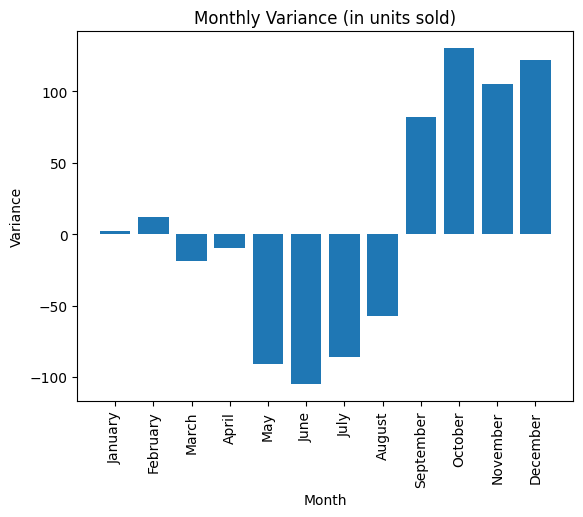

In [ ]:
plt.bar(x=sorted_monthly_variance['month'],height=sorted_monthly_variance['variance'])
plt.xlabel('Month')
plt.ylabel('Variance')
plt.title('Monthly Variance (in units sold)')
plt.xticks(ticks=sorted_monthly_variance['month'],rotation=90)
plt.show()

In [ ]:
regionwise_variance=merged_table.groupby(['region'])['variance'].sum().reset_index()
regionwise_variance

,region,variance
0,East,-70
1,North,71
2,South,118
3,West,-34


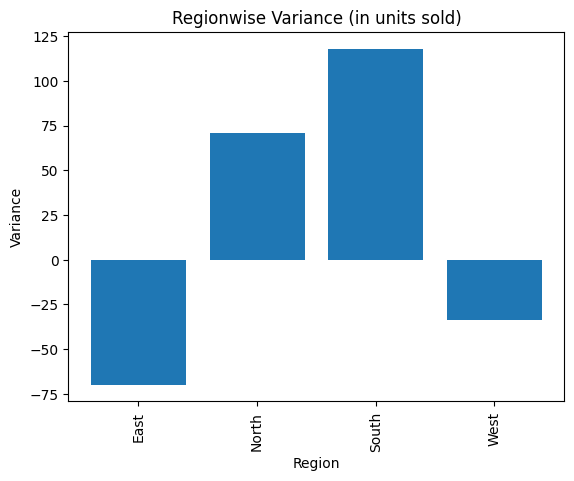

In [ ]:
plt.bar(x=regionwise_variance['region'],height=regionwise_variance['variance'])
plt.xlabel('Region')
plt.ylabel('Variance')
plt.title('Regionwise Variance (in units sold)')
plt.xticks(ticks=regionwise_variance['region'],rotation=90)
plt.show()

In [ ]:
statewise_variance=merged_table.groupby(['state'])['variance'].sum().reset_index()
statewise_variance

,state,variance
0,Andhra Pradesh,54
1,Gujarat,-21
2,Haryana,3
3,Karnataka,55
4,Maharashtra,-29
5,Punjab,50
6,Rajasthan,-13
7,Tamil Nadu,38
8,Uttar Pradesh,18
9,West Bengal,-70


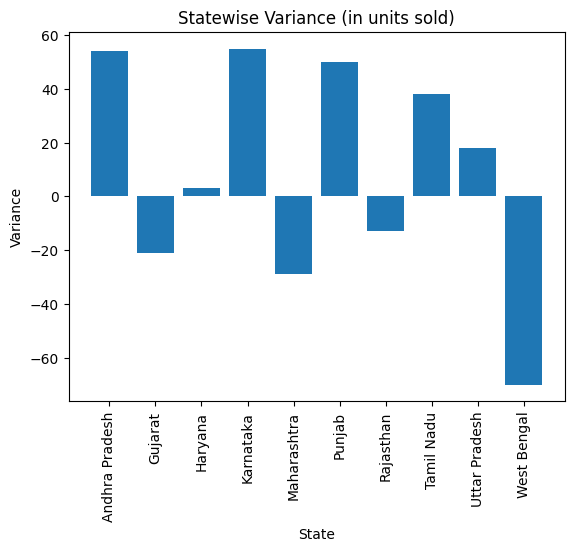

In [ ]:
plt.bar(x=statewise_variance['state'],height=statewise_variance['variance'])
plt.xlabel('State')
plt.ylabel('Variance')
plt.title('Statewise Variance (in units sold)')
plt.xticks(ticks=statewise_variance['state'],rotation=90)
plt.show()